In [1]:
import glob
import json
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [7]:
left_paths = sorted(glob.glob('/root/data/rnd/small_pen_data_collection/sotra-small-pen/pen-1/2018-10-01/181001010000/left*'))
right_paths = sorted(glob.glob('/root/data/rnd/small_pen_data_collection/sotra-small-pen/pen-1/2018-10-01/181001010000/right*'))
assert len(left_paths) == len(right_paths)
print("number of pairs: {}".format(len(left_paths)))

number of pairs: 10


In [8]:
# problem dict
timestamps = {}
for path in left_paths + right_paths:
    ts = int(os.path.basename(path).split('.')[0].split('_')[-1])
    side = os.path.basename(path).split('.')[0].split('_')[0]
    if ts not in timestamps:
        timestamps[ts] = {}
    timestamps[ts][side] = path

In [9]:
print("number of unique timestamps: {}".format(len(timestamps.keys())))
print("number of left images: {}".format(len([v for (k, v) in timestamps.items() if "left" in v])))
print("number of right images: {}".format(len([v for (k, v) in timestamps.items() if "right" in v])))
print("number of pairs: {}".format(len([v for (k, v) in timestamps.items() if "right" in v and "left" in v])))

number of unique timestamps: 10
number of left images: 10
number of right images: 10
number of pairs: 10


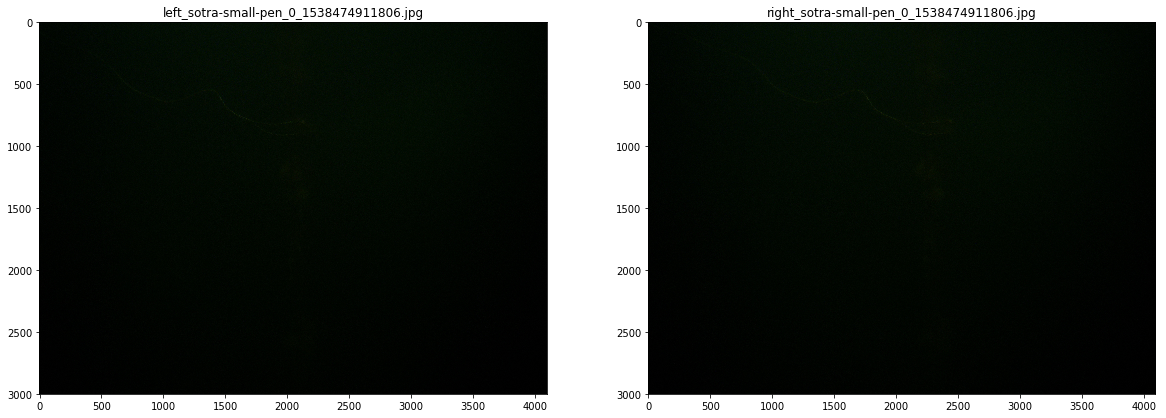

In [10]:
good_timestamps = [k for (k, v) in timestamps.items() if "right" in v and "left" in v]
for ts in sorted(good_timestamps)[::10]:
    f, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(Image.open(timestamps[ts]["left"]))
    ax[0].set_title(os.path.basename(timestamps[ts]["left"]))
    ax[1].imshow(Image.open(timestamps[ts]["right"]))
    ax[1].set_title(os.path.basename(timestamps[ts]["right"]))
    plt.show()